## Setup

A célula abaixo carrega as bibliotecas e arquivos necessários para gerar os dataframes e suas respectivas explorações neste .ipynb.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#online_pageviews = pd.read_json('dados/online_pageviews.json',lines='True')
offline_sales = pd.read_json('dados/offline_sales.json',lines='True')
online_orders = pd.read_json('dados/online_orders.json', lines='True')

## 1. Qual foi o faturamento total no período? 

Pode-se determinar o faturamento total do presente período fiscal como a soma do valor total de todos os pedidos online e físicos listados, sendo o valor total de um pedido determinado por `total_order_value = quantity X price`.

Assim, criando uma coluna adicional em cada dataframe de vendas, pode-se obter a soma do valor final de todas elas, online e físicas, conforme a céulula abaixo.

In [ ]:
offline_sales['total_order_value'] = offline_sales.apply(lambda row: (row['quantity'] * row['price']), axis=1)
online_orders['total_order_value'] = online_orders.apply(lambda row: (row['quantity'] * row['price']), axis=1)
total_value_from_sales_sum = offline_sales.total_order_value.sum() + online_orders.total_order_value.sum()
total_value_from_sales_sum


## 2. Qual foi o produto mais vendido online?

Para tanto, a forma mais direta é obter quais quantidades de produto estão associadas a determinado id de produto em cada pedido, somando-as e comparando de acordo. 

Buscando no dataframe 'online_orders', pode-se utilizar o método 'groupby' do pandas para agrupar todos os ids de produto e suas respectivas quantidades, que, conjuntamente com o método 'apply' e argumento 'sum', soma todos os valores encontrados de quantidade em função do id associado.

In [ ]:
most_sold = online_orders.groupby('on_product_id')['quantity'].apply(sum).reset_index(drop=False)
most_sold.iloc[most_sold['quantity'].idxmax()]

## 3. Cariocas gostam de comprar fim de semana?

"Gostam" é um critério muito subjetivo e **muito** dependente de contexto. Idealmente, 'gostar' envolve satisfação e prazer. No entanto, com os dados presentes, podemos fazer uma inferência de 'preferir', comparando o volume de vendas entre os dias de semana e o final de semana. 

Como o dataframe de entrada só possui datas em valor numérico no formato `date`, é melhor criar uma nova coluna que a partir desta data, nos dá o dia da semana, o que torna a comparação entre as vendas de sábado e domingo com as de segunda a sexta muito mais fáceis.

In [ ]:
# listas para comparações
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday']
weekend = ['Saturday','Sunday']

# gerar coluna
offline_sales['day_of_the_week'] = offline_sales['date'].dt.day_name()

# novos dataframes a partir da nova coluna
#RJ_weekday_sales = offline_sales.loc[(offline_sales['state'] == 'RJ') & (offline_sales['day_of_the_week'].isin(weekday))]
#RJ_weekend_sales = offline_sales.loc[(offline_sales['state'] == 'RJ') & (offline_sales['day_of_the_week'].isin(weekend))]
RJ_sales = offline_sales.loc[(offline_sales['state'] == 'RJ')]




Este tipo de questionamento conduz muito naturalmente a algum tipo de visualização. Como queremos saber a questão de preferência por volume de vendas, vamos comparar por dia da semana. No entanto, algumas necessidades específicas das ferramentas requerem certa manipulação.

Primeiro, para organizar o gráfico, devemos gerar uma série categórica que nos dá a ordem da semana (para os fins daqui, segunda a domingo). Depois, agrupamos a soma de todos os valores de venda de cada pedido em função do dia da semana, mostrados em barras.

(*NOTA TÉCNICA: importante notar que, ao gerar o gráfico via célula abaixo, o Pandas retorna um aviso. Isto ocorre devido a uma peculiaridade da linguagem Python e sua flexibilidade interpretativa, que para o Pandas, gera problemas por não saber se as engrenagens do Python estão retornando uma cópia ou uma 'view' (representação) do que foi atribuído. Como não serão feitas manipulações subsequentes dali, pode-se obter a visualização sem problemas.*)

C:\Users\main\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


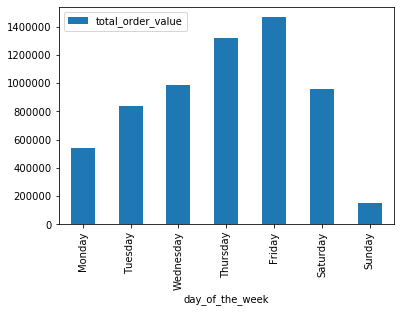

In [45]:
RJ_sales['day_of_the_week'] = pd.Categorical(RJ_sales['day_of_the_week'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

RJ_sales_bar_plot = RJ_sales.groupby('day_of_the_week')['total_order_value'].apply(sum).reset_index(drop=False).plot(x='day_of_the_week',y='total_order_value', kind='bar')
